# Criando nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [3]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
pd.concat(frames)['nome'].to_frame()

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [7]:
nomes = pd.concat(frames)['nome'].to_frame()

In [8]:
nomes.sample(5)

,nome
182,CHARLES
52,LUZIA
79,VALDIR
148,APARECIDO
124,CESAR


# Incluindo ID dos Alunos

In [9]:
import numpy as np

In [10]:
np.random.seed(123)

In [11]:
total_alunos = len(nomes)
total_alunos

400

In [12]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [14]:
dominios = ['@dominiodoemail.com.br', '@servicodeemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodeemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodeemail.com,daiane@servicodeemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a Tabela Cursos

In [18]:
!pip3 install html5lib
!pip3 install lxml

In [19]:
import html5lib

In [20]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [21]:
cursos = pd.read_html(url)

In [22]:
type(cursos)

list

In [23]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [24]:
cursos = cursos[0]

In [25]:
type(cursos)

pandas.core.frame.DataFrame

In [26]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o Index de Cursos

In [27]:
cursos = cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})

In [28]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [29]:
cursos['id'] = cursos.index + 1

In [30]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [31]:
cursos = cursos.set_index('id')

In [32]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os Alunos nos Cursos

In [33]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodeemail.com,rebeca@servicodeemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodeemail.com,joaquim@servicodeemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [34]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodeemail.com,ruan@servicodeemail.com,1
44,RAIMUNDA,259,@servicodeemail.com,raimunda@servicodeemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodeemail.com,adriano@servicodeemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1


In [36]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [37]:
import seaborn as sns

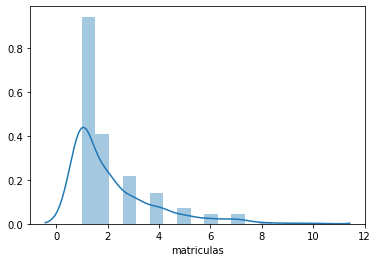

In [38]:
sns.distplot(nomes.matriculas)

In [39]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

# Selecionando cursos

In [40]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodeemail.com,barbara@servicodeemail.com,1
170,ALEXANDRO,341,@servicodeemail.com,alexandro@servicodeemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2


In [41]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [42]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])


In [43]:
matriculas.sample(3)

,id_aluno,id_curso
289,357,20
264,190,9
321,352,6


In [44]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

In [45]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
29,TIAGO,267,@dominiodoemail.com.br,tiago@dominiodoemail.com.br,1
170,MARINALVA,243,@dominiodoemail.com.br,marinalva@dominiodoemail.com.br,4
4,CARLOS,230,@servicodeemail.com,carlos@servicodeemail.com,1


In [46]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [47]:
matriculas

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12
...,...,...
854,383,12
855,366,1
856,366,19
857,366,10


In [48]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


# Saída em Diferentes Formatos

In [49]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web


In [50]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [51]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [52]:
matriculas_json = matriculas_por_curso.to_json()

In [53]:
matriculas_json

'{"quantidade_de_alunos":{"1":59,"2":31,"3":53,"4":4,"5":12,"6":75,"7":32,"8":18,"9":59,"10":40,"11":61,"12":66,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":75,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [54]:
matriculas_html = matriculas_por_curso.to_html()

In [55]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>59</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>75</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

# Criando o Banco SQL

In [56]:
# !pip install sqlalchemy

In [57]:
from sqlalchemy import create_engine, MetaData, Table

In [58]:
engine = create_engine('sqlite:///:memory:')

In [59]:
engine

Engine(sqlite:///:memory:)

In [60]:
type(engine)

sqlalchemy.engine.base.Engine

In [61]:
matriculas_por_curso.to_sql('matriculas', engine)

In [62]:
print(engine.table_names())

['matriculas']


# Buscando no Bando SQL

In [63]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [64]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [65]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [66]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,59
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,75
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,40


In [67]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 50')

In [68]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,59
2,C# para Web,53
5,PHP com MySql,75
8,TDD com Java,59
10,Preparatório para certificação Java,61
11,Hardware básico,66
16,Internet das coisas,56
17,Programação funcional,53
18,Boas práticas em Java,75


# Escrevendo no Banco

In [69]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [70]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nome dos Alunos e Alunas da Proxima Turma

In [71]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [72]:
id_curso = 16

In [73]:
proxima_turma = matriculas.query(f'id_curso == {id_curso}')

In [74]:
proxima_turma.sample(10)

,id_aluno,id_curso
631,251,16
23,218,16
650,110,16
44,80,16
681,320,16
136,21,16
231,149,16
477,162,16
781,354,16
798,385,16


In [75]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
46,LUCIANO,63,@dominiodoemail.com.br,luciano@dominiodoemail.com.br,1
87,ALICE,273,@servicodeemail.com,alice@servicodeemail.com,5
100,JOEL,194,@dominiodoemail.com.br,joel@dominiodoemail.com.br,2


In [76]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
5,16,SEVERINA,@dominiodoemail.com.br,severina@dominiodoemail.com.br,4
21,16,BIANCA,@servicodeemail.com,bianca@servicodeemail.com,4
36,16,KARINA,@dominiodoemail.com.br,karina@dominiodoemail.com.br,1
48,16,ALISON,@servicodeemail.com,alison@servicodeemail.com,1
55,16,MARCIA,@dominiodoemail.com.br,marcia@dominiodoemail.com.br,3
80,16,VITORIA,@servicodeemail.com,vitoria@servicodeemail.com,4
108,16,LUIZA,@servicodeemail.com,luiza@servicodeemail.com,7
110,16,OSVALDO,@servicodeemail.com,osvaldo@servicodeemail.com,3
110,16,OSVALDO,@servicodeemail.com,osvaldo@servicodeemail.com,3


In [77]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
5       SEVERINA
21        BIANCA
36        KARINA
48        ALISON
55        MARCIA
80       VITORIA
108        LUIZA
110      OSVALDO
110      OSVALDO
148        THAIS
149     MARILENE
153    CONCEICAO
162       RAFAEL
164        MARIO
170    REGINALDO
179         TAIS
196      ADRIANO
202        ESTER
208         LUIZ
214        JAIME
218       CAMILA
222      IVONETE
235        MARIA
251        MAURO
255       WESLEY
259     RAIMUNDA
266        CELSO
275         EDNA
279       WILIAN
304    FRANCISCA
320       ARTHUR
340         IAGO
346       LURDES
354     EDIVALDO
364      ROBERTO
369      POLIANA
377      VALERIA
385       MICHEL
389      LIDIANE
390       MARCOS
392       NELSON
398     CRISTIAN
399       CICERA
Name: nome, dtype: object

In [78]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [79]:
proxima_turma

,nome
id_aluno,
5,SEVERINA
21,BIANCA
36,KARINA
48,ALISON
55,MARCIA
80,VITORIA
108,LUIZA
110,OSVALDO
110,OSVALDO


In [80]:
nome_curso = cursos.loc[id_curso]

In [81]:
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [82]:
nome_curso = nome_curso.nome_do_curso

In [83]:
nome_curso

'Estatística básica'

In [84]:
proxima_turma = proxima_turma.rename(columns = {'nome' : f'Alunos do curso de {nome_curso}'})

In [85]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
5,SEVERINA
21,BIANCA
36,KARINA
48,ALISON
55,MARCIA
80,VITORIA
108,LUIZA
110,OSVALDO
110,OSVALDO


In [86]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
202,ESTER
170,REGINALDO
153,CONCEICAO
214,JAIME
385,MICHEL


# Excel: Salvando e lendo

In [87]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [88]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,SEVERINA
1,BIANCA
2,KARINA
3,ALISON
4,MARCIA
5,VITORIA
6,LUIZA
7,OSVALDO
8,OSVALDO
9,THAIS
